In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import glob
# import ffmpeg
%matplotlib inline

# import seaborn
# seaborn.set(style='ticks')

import warnings
warnings.filterwarnings("ignore")

### 1. List audio files

In [2]:
# Read mp3
audio_files = []
for fn_mp3 in glob.glob("audio/*"):
    audio_files.append(fn_mp3)
audio_files

['audio/190607.mp3',
 'audio/220340.mp3',
 'audio/47214-Band-winged Nightjar.mp3',
 'audio/337258.mp3',
 'audio/337257.mp3',
 'audio/220339.mp3',
 'audio/220338.mp3',
 'audio/204956.mp3',
 'audio/262782.mp3',
 'audio/262783.mp3']

### 2. Choose audio test file and load into librosa

In [3]:
audio_file = audio_files[2]
# load time series of audio amplitudes and sampling rate
# Note by default librosa sets the sampling rate to 22,050 Hz. This can be changed.
y, sr = librosa.load(audio_file)

### 3. Plot waveform (amplitude vs time) and play file

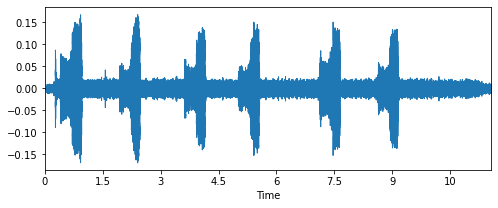

In [45]:
# Plot waveform using librosa function waveplot()
# Note: Librosa used matplotlib
fig, ax = plt.subplots(figsize=(8, 3))
librosa.display.waveplot(y, sr)

Sampling rate=22050 Hz, amplitudes shape=(255168,),
amplitudes type=<class 'numpy.ndarray'>, amplitudes data type=float32


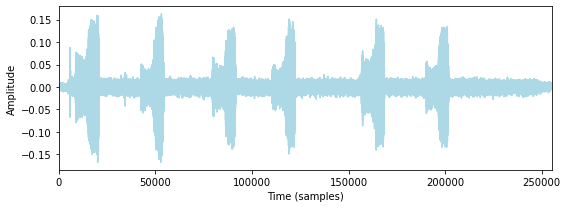

In [46]:
# Plot waveform using matplotlib directly and play file
def print_plot_play(amplitudes, sampling_rate, text=''):
    """1. Prints information about an audio signal, 2. plots the waveform, and 3. Creates player
    Args: 
        amplitudes: Input signal amplitudes
        sampling_rate: Sampling rate of input signal    
        text: Text to print
    """

    print(f"Sampling rate={sampling_rate} Hz, amplitudes shape={amplitudes.shape},\n"
          f"amplitudes type={type(amplitudes)}, amplitudes data type={amplitudes.dtype}")
    plt.figure(figsize=(8, 3))
    plt.plot(amplitudes, color='lightblue')
    plt.xlim([0, amplitudes.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=amplitudes, rate=sampling_rate))


print_plot_play(amplitudes=y, sampling_rate=sr, text='MP3 file: ')

### 4. Spectogram with Short Fourier Transform
  
https://librosa.org/doc/latest/generated/librosa.stft.html#librosa.stft
    
**stft by default loads:** 
sampling rate sr = 22,050 Hz  
snippets per fram n_fft = 2,048  
hop length = 512  


<Figure size 432x288 with 0 Axes>

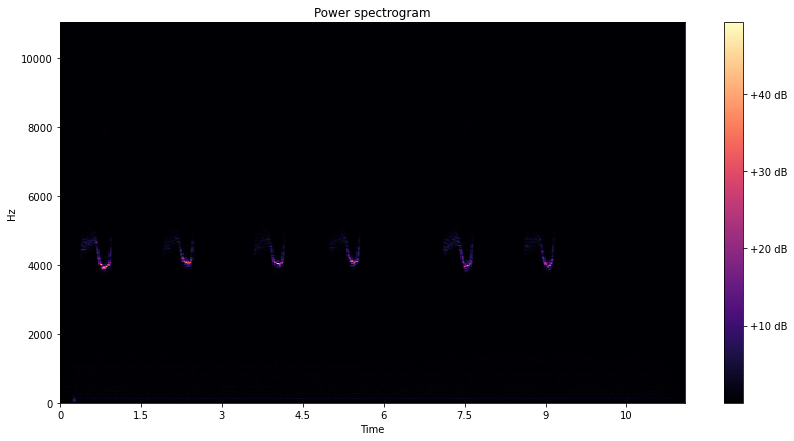

<Figure size 432x288 with 0 Axes>

In [59]:
# Do Short Time Fourier Transform on audio signal amplitudes
S = np.abs(librosa.stft(y))
# print(S[0])
# sgram = librosa.stft(S)

# Plot a spectorgram
fig, ax = plt.subplots(figsize=(14, 7))
# Lirosa specshow is a wrapper on matplotlib
img = librosa.display.specshow(S,
                               y_axis='linear', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')

fig.colorbar(img, ax=ax, format="%+2.0f dB")

plt.figure()

<Figure size 432x288 with 0 Axes>

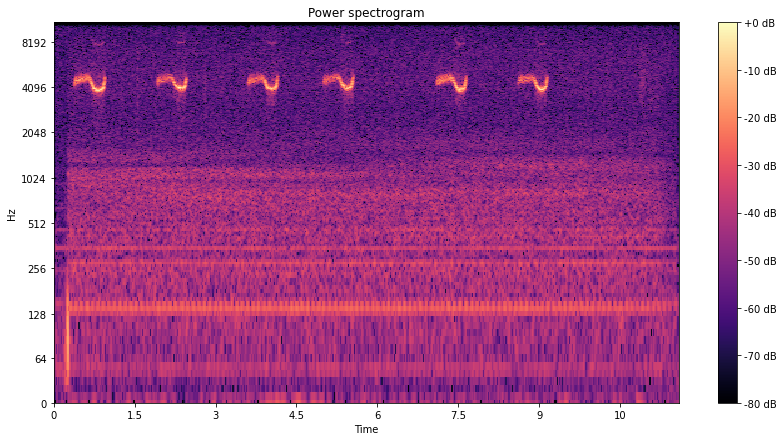

<Figure size 432x288 with 0 Axes>

In [62]:
# Decibels are log power. Should S be squared?
decibels = librosa.amplitude_to_db(S, ref=np.max)
# Plot a spectorgram
fig, ax = plt.subplots(figsize=(14, 7))
img = librosa.display.specshow(decibels,
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')

fig.colorbar(img, ax=ax, format="%+2.0f dB")

plt.figure()

### 5. Onset  
  
https://musicinformationretrieval.com/onset_detection.html

<Figure size 432x288 with 0 Axes>

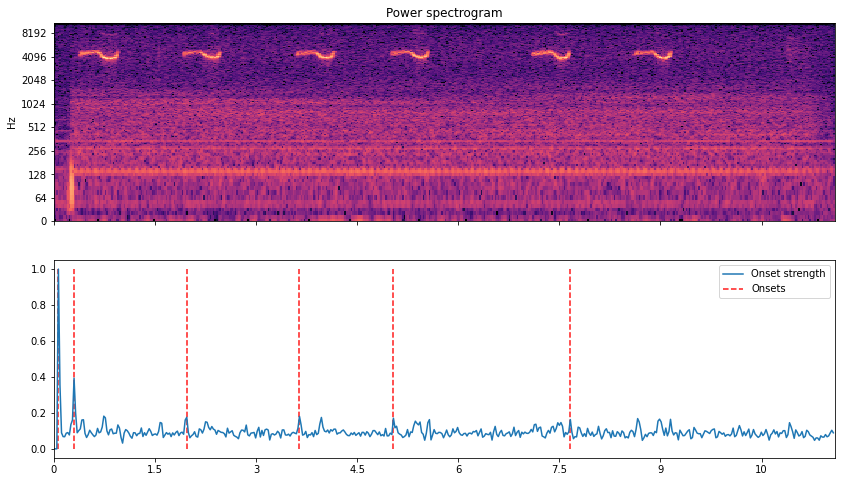

<Figure size 432x288 with 0 Axes>

In [51]:
o_env = librosa.onset.onset_strength(y, sr=sr)

times = librosa.times_like(o_env, sr=sr)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)



D = np.abs(librosa.stft(y))

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(14, 8))

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),

                         x_axis='time', y_axis='log', ax=ax[0])

ax[0].set(title='Power spectrogram')

ax[0].label_outer()

ax[1].plot(times, o_env, label='Onset strength')

ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,

           linestyle='--', label='Onsets')

ax[1].legend()

plt.figure()

## MFCC, Mel Spectrogram, Chromagram

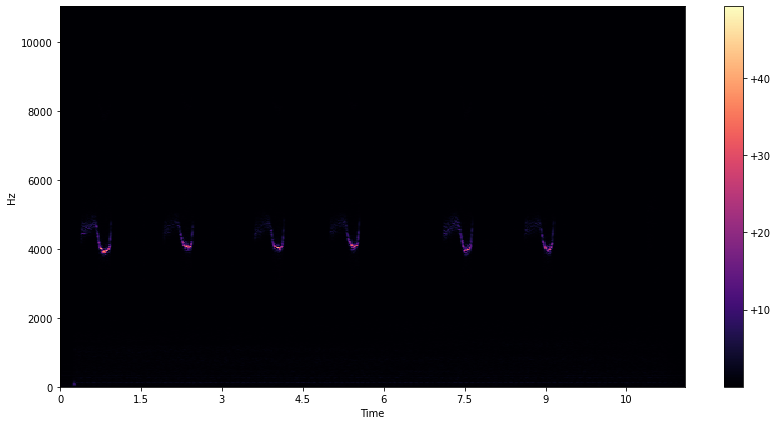

In [63]:
fig, ax = plt.subplots(figsize=(14, 7))
sgram = librosa.stft(y)
img=librosa.display.specshow(sgram, x_axis='time', y_axis='hz')
fig.colorbar(img, ax=ax, format="%+2.f")

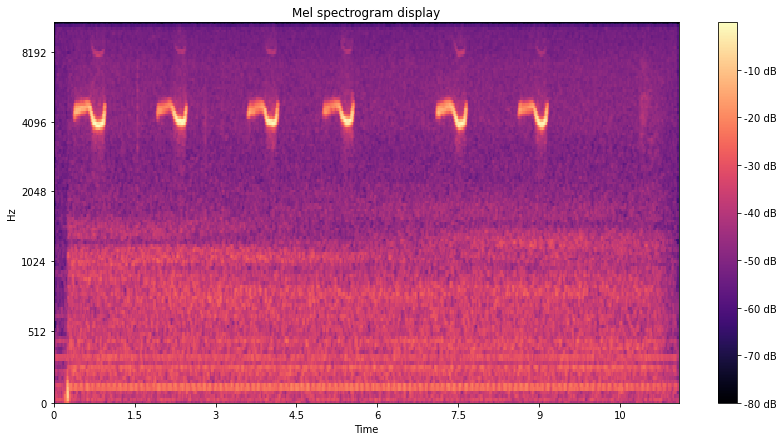

In [64]:
fig, ax = plt.subplots(figsize=(14, 7))
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

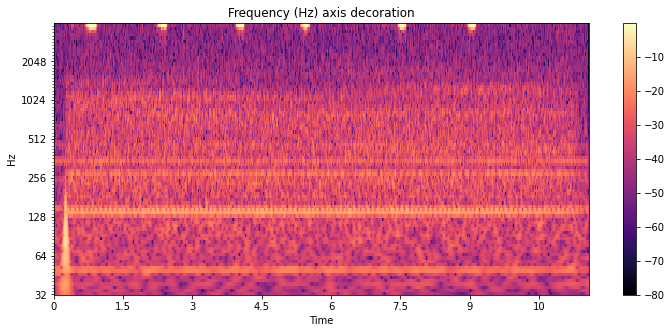

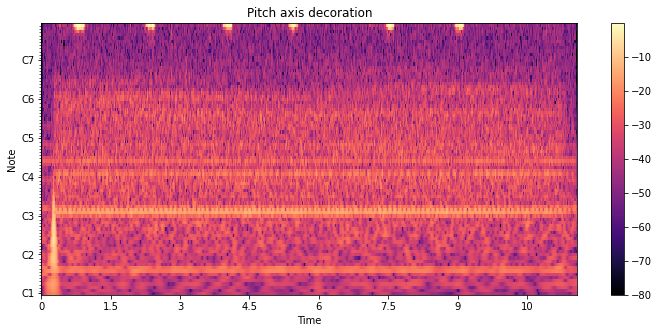

In [65]:
C = librosa.cqt(y=y, sr=sr)
C_db = librosa.amplitude_to_db(np.abs(C), ref=np.max)

fig, ax = plt.subplots(figsize=(12, 5))
librosa.display.specshow(C_db, y_axis='cqt_hz', x_axis='time', ax=ax)
ax.set(title='Frequency (Hz) axis decoration')
fig.colorbar(img, ax=ax)

fig, ax = plt.subplots(figsize=(12, 5))
librosa.display.specshow(C_db, y_axis='cqt_note', x_axis='time', ax=ax)
ax.set(title='Pitch axis decoration')
fig.colorbar(img, ax=ax)

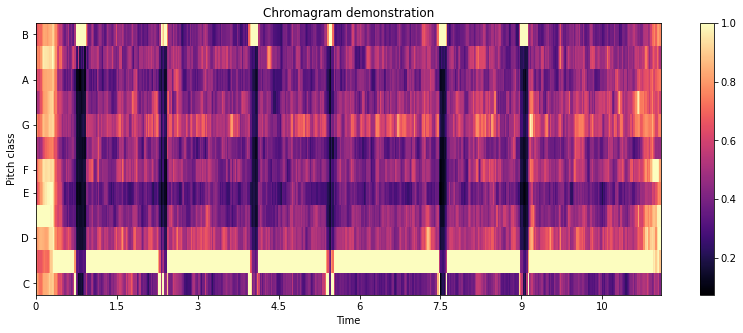

In [66]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
fig, ax = plt.subplots(figsize=(14, 5))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram demonstration')
fig.colorbar(img, ax=ax)

In [67]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

[(1.0, 10.0)]

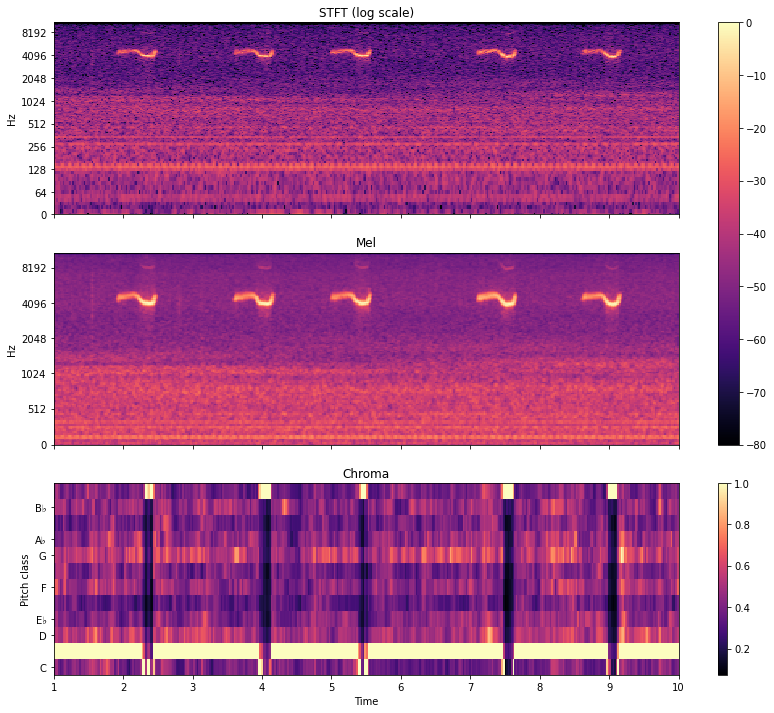

In [68]:
# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(14, 12))

# On the first subplot, show the original spectrogram
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='STFT (log scale)')

# On the second subplot, show the mel spectrogram
img2 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set(title='Mel')

# On the third subplot, show the chroma features
img3 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                key='Eb:maj', ax=ax[2])
ax[2].set(title='Chroma')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()

# And we can share colorbars:
fig.colorbar(img1, ax=[ax[0], ax[1]])

# Or have individual colorbars:
fig.colorbar(img3, ax=[ax[2]])

# We can then even do fancy things like zoom into a particular time and frequency
# region.  Since the axes are shared, this will apply to all three subplots at once.
ax[0].set(xlim=[1, 10])  # Zoom to seconds 1-10